In [1]:
# Local scripts
import pyClientRLagentPytorch
from pyClientRLagentPytorch import Environment


# Pytorch, numpy, etc. 
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation

### Connect to Environment

Connect to the unity hallway environment.

#### Attention: Start Unity server first!

In [2]:
# Unity environment
ip         = "127.0.0.1" # Ip address that the TCP/IP interface listens to
port       = 13000       # Port number that the TCP/IP interface listens to
size       = 128
screen_height = screen_width = size

environment = pyClientRLagentPytorch.Environment(ip = ip, port = port, size = size)

print(environment.client)

<socket.socket fd=58, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 57650), raddr=('127.0.0.1', 13000)>


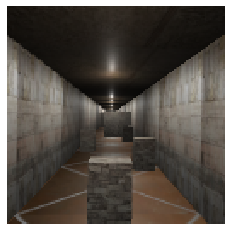

In [3]:
# Reset environment
end, reward, state_raw = environment.reset()

# display current state (128x128 image)
def display_state(state_raw):
    image_array = environment.state2usableArray(state_raw)
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()
    return
display_state(state_raw)

<IPython.core.display.Javascript object>


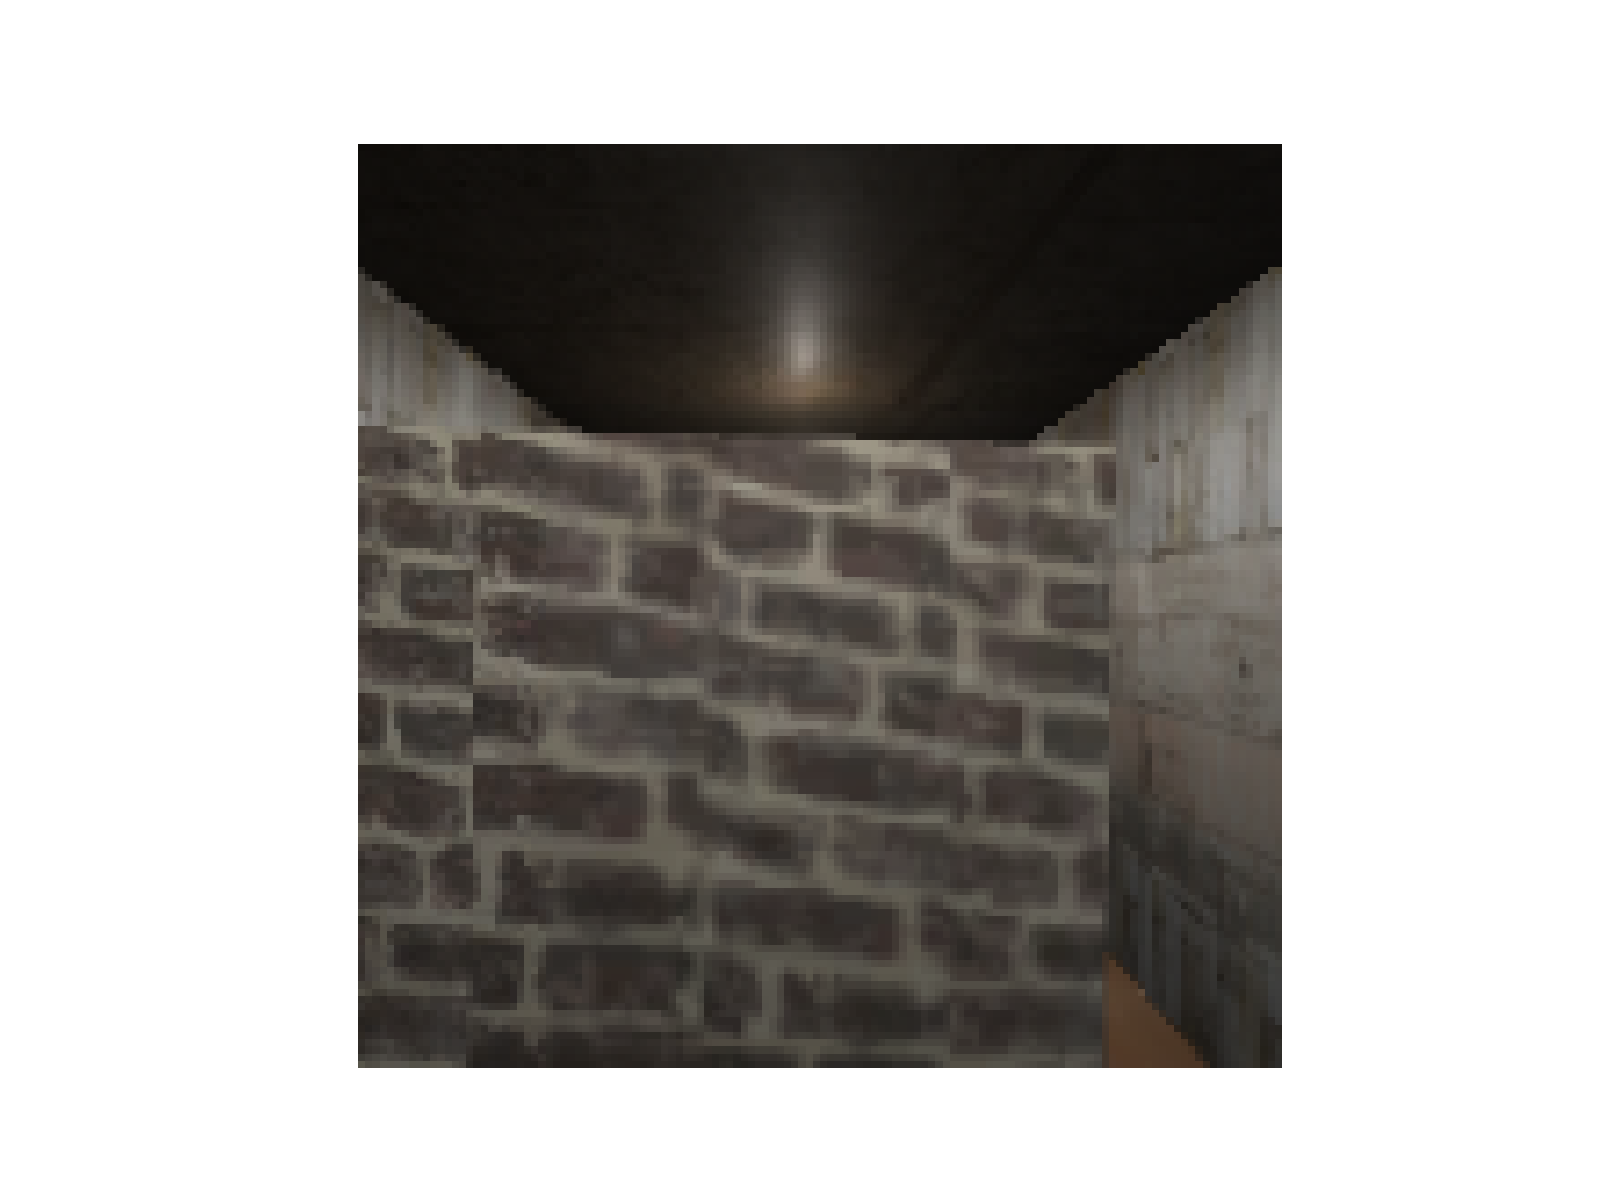

In [4]:
import matplotlib
%matplotlib notebook

f = plt.figure()
ax = f.gca()

im = environment.state2usableArray(state_raw)
image = plt.imshow(im, interpolation='None', animated=True)
plt.axis('off')

def animateSteps(frame_index):
    # Take a step 0:forward 1:left 2:right
    command = np.random.randint(3)
    end, reward, state_raw = environment.step(command)
    im = environment.state2usableArray(state_raw)
    
    # update frame
    image.set_data(im)
#     ax.set_title(str(frame_index))
    return image,

ani = matplotlib.animation.FuncAnimation(f, animateSteps, interval=10, frames=10, blit=True)

In [4]:
from model import DQN



In [5]:
net = DQN